In [1]:
#!pip install threadpoolctl==3.1.0


In [2]:
#!pip install mlxtend

In [1]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.feature_selection import (
    SequentialFeatureSelector,
)
from mlxtend.evaluate import feature_importance_permutation
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.utils.estimator_checks import check_estimator
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
import matplotlib.ticker as ticker
import os
from pathlib import Path
import json

import sys

sys.path.append("scripts")

import utils
import distclassipy as dcpy

cd = dcpy.Distance()

/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
import warnings

warnings.filterwarnings('ignore')
# Ignore the specific RuntimeWarning

#warnings.filterwarnings(action='ignore', category=FutureWarning)
#warnings.filterwarnings(action='ignore', category=UserWarning)

In [6]:
# Load Data
X_df_FULL = pd.read_csv("data/X_df.csv", index_col=0)
y_df_FULL = pd.read_csv("data/y_df.csv", index_col=0)

In [7]:
y_df_FULL["class"].value_counts()

class
SR       558
DSCT     558
CEP      558
EW       558
RR       558
RSCVN    558
BYDra    558
RRc      558
Mira     558
EA       558
Name: count, dtype: int64

In [8]:
# Remove manually selected 'bad' features
with open(os.path.join("results", results_subfolder, "drop_features.txt")) as f:
    bad_features = json.load(f)  # manually selected

X_df_FULL = X_df_FULL.drop(bad_features, axis=1)

print(X_df_FULL.shape[1])

31


In [10]:
feats_top_plot = 15
### For plotting only - how many features to plot in relative importance

### Distance Based

In [11]:
all_metrics = [
    "euclidean",
    "braycurtis",
    "canberra",
    "cityblock",
    "chebyshev",
    cd.clark,
    "correlation",
    "cosine",
    cd.hellinger,
    cd.jaccard,
    cd.lorentzian,
    cd.marylandbridge,
    cd.meehl,
    cd.motyka,
    cd.soergel,
    cd.wave_hedges,
    cd.kulczynski,
    cd.add_chisq,
]

scoring = "f1_macro"
feats_to_keep = X_df_FULL.columns

In [3]:
with open("settings.txt") as f:
    settings_dict = json.load(f)
np.random.seed(settings_dict["seed_choice"])

classification_letter = "c"
classification_problem = settings_dict["classification_problem"][classification_letter]
classes_to_keep = settings_dict["classes_to_keep"][classification_letter]
results_subfolder = f"{classification_letter}. {classification_problem}"
sns_dict = settings_dict["sns_dict"]

sns.set_theme(**sns_dict)

In [9]:
# Keep only current classes
cl_keep_str = "_".join(classes_to_keep)

y_df = y_df_FULL[y_df_FULL["class"].isin(classes_to_keep)]
X_df = X_df_FULL.loc[y_df.index]
X = X_df.to_numpy()
y = y_df.to_numpy().ravel()

In [12]:
allns = []
all_selected_scores = []
all_metric_strs = []

In [ ]:
from sklearn.model_selection import GridSearchCV

# Confidence calculation
classification_letter = "b"


X_train, X_test, y_train, y_test = train_test_split(
    X_sfs, y, test_size=0.33, random_state=settings_dict["seed_choice"]
)

lcdc = dcpy.DistanceMetricClassifier()

parameters = {"metric":all_metrics, "scale_std":["True", "False"],
              "calculate_kde":["True", "False"], 
              "calculate_1d_dist":["True", "False"]}

clf = GridSearchCV(lcdc, parameters, scoring='f1_macro')
clf.fit(X_train, y_train)



In [34]:
pd.DataFrame(clf.cv_results_).sort_values("mean_test_score", ascending=False).to_csv(f"gridsearch_{classification_letter}.csv")

Metric:   0%|          | 0/2 [00:00<?, ?it/s]

******************** Euclidean ********************


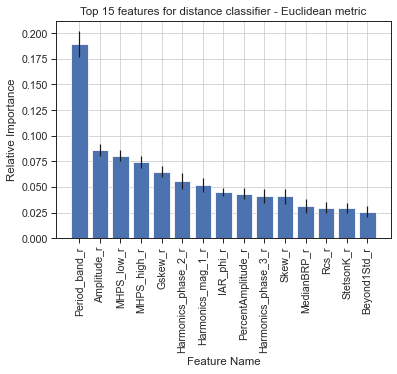

/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently in

/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

Euclidean: Selected 4 features: ['Period_band_r', 'Psi_eta_r', 'Harmonics_phase_2_r', 'IAR_phi_r']


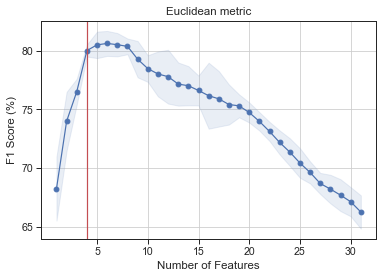

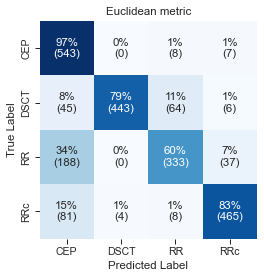

F1 = 80.04 %
Accuracy = 79.93 %
Matthew's Coefficient = 74.49 %
******************** Braycurtis ********************


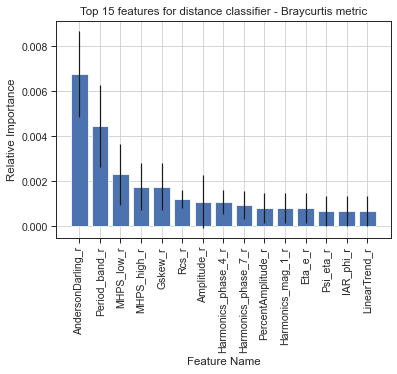

/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/fbianco/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

Braycurtis: Selected 4 features: ['MHPS_ratio_r', 'MHPS_low_r', 'Period_band_r', 'GP_DRW_tau_r']


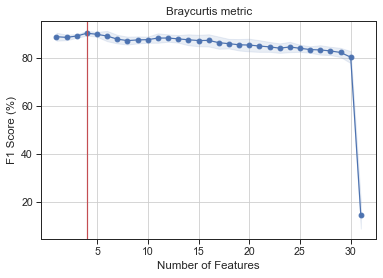

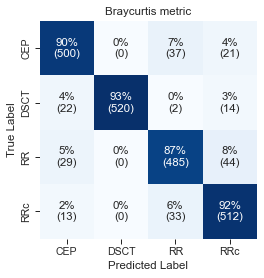

F1 = 90.43 %
Accuracy = 90.37 %
Matthew's Coefficient = 87.19 %


In [13]:
for metric in tqdm(all_metrics, desc="Metric", leave=True):
    metric_str = utils.get_metric_name(metric)
    locpath = os.path.join("results", results_subfolder, "distclassipy", metric_str)
    print("*" * 20, metric_str, "*" * 20)
    Path(locpath).mkdir(parents=True, exist_ok=True)

    # Feature Importance via Feature Permutation

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, stratify=y
    )

    lcdc = dcpy.DistanceMetricClassifier(
        metric=metric, scale_std=True, calculate_kde=False, calculate_1d_dist=False
    )
    lcdc.fit(X_train, y_train)

    imp_vals, imp_all = feature_importance_permutation(
        predict_method=lcdc.predict,
        X=X_test,
        y=y_test,
        metric="accuracy",
        num_rounds=10,
        seed=settings_dict["seed_choice"],
    )

    std = np.std(imp_all, axis=1)
    indices = np.argsort(imp_vals)[::-1]

    x_ax = range(X.shape[1])
    y_ax = imp_vals[indices]
    yerr = std[indices]
    featnames = X_df.columns[indices]

    fig, ax = plt.subplots()
    ax.bar(x_ax[:feats_top_plot], y_ax[:feats_top_plot], yerr=yerr[:feats_top_plot])
    ax.set_title(
        f"Top {feats_top_plot} features for distance classifier - {metric_str.title()} metric"
    )
    ax.set_xticks(x_ax[:feats_top_plot], featnames[:feats_top_plot], rotation=90)
    ax.set_xlabel("Feature Name")
    ax.set_ylabel("Relative Importance")

    # ax.set_xlim([-1, X.shape[1]])
    plt.savefig(f"{locpath}/feature_importance.pdf", bbox_inches="tight")
    plt.show()

    featimp_df = pd.DataFrame(
        data=y_ax, index=featnames, columns=["Relative Importance"]
    )
    featimp_df.index.name = "Feature Name"
    featimp_df.to_csv(f"{locpath}/feature_importance.csv")

    # Sequential Feature Selection 1-31 features

    lcdc = dcpy.DistanceMetricClassifier(
        metric=metric, scale_std=True, calculate_kde=False, calculate_1d_dist=False
    )

    feat_selector = SequentialFeatureSelector(
        lcdc,
        k_features=X_df_FULL.shape[1],
        scoring=scoring,
        forward=True,
        n_jobs=-1,
        verbose=0,
    ).fit(X_df.loc[:, feats_to_keep], y)

    res_df = pd.DataFrame.from_dict(feat_selector.get_metric_dict()).T
    res_df.index.name = "num_feats"
    res_df["avg_score"] = res_df["avg_score"].astype("float")
    res_df = res_df.sort_values(by="avg_score", ascending=False)
    res_df.to_csv(f"{locpath}/sfs_allfeatures.csv")

    fig1 = plot_sfs(
        feat_selector.get_metric_dict(),
        kind="std_dev",
        # color=sns.color_palette("Paired")[1],
        # bcolor=sns.color_palette("Paired")[0],
        color=sns.color_palette()[0],
        bcolor="#93aad0",
        ylabel="F1 Score (%)",  # scoring
    )
    # plt.grid()

    tick_freq = 5
    plt.xticks(
        [x for x in list(feat_selector.get_metric_dict().keys()) if x % tick_freq == 0]
    )

    # Temp fix to get % instead of 0-1 values
    axtemp = plt.gca()
    axtemp.yaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, pos: "{0:g}".format(x * 100))
    )

    plt.locator_params(axis="y", nbins=6)
    plt.title(f"{metric_str.title()} metric")
    plt.savefig(f"{locpath}/sfs_allfeatures_plot.pdf", bbox_inches="tight")

    # Reloading to
    sfs_df = pd.read_csv(f"{locpath}/sfs_allfeatures.csv", index_col=0)
    feats_idx, feats = utils.load_best_features(sfs_df)

    print(f"{metric_str}: Selected {len(feats)} features: {feats}")
    plt.axvline(x=len(feats), color=sns.color_palette()[3], label="Selected features")
    # plt.legend()
    plt.savefig(f"{locpath}/sfs_allfeatures_plot_marked.pdf", bbox_inches="tight")
    plt.show()

    # Using the Selected Feature Subset For Making New Predictions

    # Cross validation
    lcdc = dcpy.DistanceMetricClassifier(
        metric=metric, scale_std=True, calculate_kde=False, calculate_1d_dist=False
    )
    X_sfs = X[:, feats_idx]
    y_pred = cross_val_predict(lcdc, X_sfs, y, cv=5, n_jobs=-1)

    acc = accuracy_score(y, y_pred)
    f1score = f1_score(y, y_pred, average="macro")
    matthew_coef = matthews_corrcoef(y, y_pred)

    ax = utils.plot_cm(y_true=y, y_pred=y_pred)
    ax.set_title(f"{metric_str.title()} metric")
    plt.savefig(f"{locpath}/sfs_best_confusion_matrix.pdf", bbox_inches="tight")
    plt.show()

    dat = np.hstack([y_pred.reshape(-1, 1), y.reshape(-1, 1)])
    objs = X_df.index
    preds_best_df = pd.DataFrame(data=dat, columns=["y_pred", "y_true"], index=objs)
    preds_best_df.to_csv(f"{locpath}/preds_best.csv")

    print(
        f"F1 = {f1score*100:.2f} %\nAccuracy = {acc*100:.2f} %\nMatthew's Coefficient = {matthew_coef*100:.2f} %"
    )

    ## new
    allns.append(len(feats))
    all_selected_scores.append(f1score)
    all_metric_strs.append(metric_str)

    # Confidence calculation

    lcdc = dcpy.DistanceMetricClassifier(
        metric=metric, scale_std=True, calculate_kde=True, calculate_1d_dist=True
    )

    X_train, X_test, y_train, y_test = train_test_split(
        X_sfs, y, test_size=0.33, random_state=settings_dict["seed_choice"]
    )

    lcdc.fit(X_train, y_train)

    y_pred_test = lcdc.predict_and_analyse(X_test)
    y_testdf = pd.DataFrame(data=y_test, columns=["class"])
    y_testdf["pred"] = y_pred_test
    y_testdf.to_csv(f"{locpath}/testpreds_class.csv")

    lcdc.df_canonical_.to_csv(f"{locpath}/df_canonical.csv")
    lcdc.canonical_dist_df_.to_csv(f"{locpath}/canonical_dist_df.csv")
    lcdc.df_std_.to_csv(f"{locpath}/df_std.csv")

    lcdc.calculate_confidence(method="distance_inverse")
    lcdc.confidence_df_.to_csv(f"{locpath}/distance_inverse_confidence.csv")

    lcdc.calculate_confidence(method="kde_likelihood")
    lcdc.confidence_df_.to_csv(f"{locpath}/kde_likelihood_confidence.csv")

    lcdc.calculate_confidence(method="1d_distance_inverse")
    lcdc.confidence_df_.to_csv(f"{locpath}/1d_distance_inverse_confidence.csv")

In [ ]:
summaryqdf = pd.DataFrame(
    data=np.array([allns, all_selected_scores]).T,
    index=all_metric_strs,
    columns=["Number of selected features", "Selected F1 Score"],
)
summaryqdf.to_csv(
    os.path.join(
        "results", results_subfolder, "distclassipy", "summary_scores_q1q5.csv"
    )
)
summaryqdf

In [ ]:
summaryqdf.describe()